In [1]:
#importing all the needed libraries for creating our exploratory plots
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import STOPWORDS
import re
import string
import pandas as pd
import seaborn as sns

In [2]:
#reading in the df 
df = pd.read_csv('../DATA/cleaned_train_lyrics.csv', encoding='latin1')
df.head()

,Unnamed: 0,Lyric,genre
0,0,"See me, ancient one! Dismal Tuat, Nergal unsaf...",Metal
1,1,Feels like Im covered in lies so turn off the ...,Metal
2,2,"Works of art, painted black Magniloquent, blee...",Metal
3,3,Into the cage like an animal You must survive ...,Metal
4,4,Paralysed in pleasure I hear you call Lost my ...,Metal


In [4]:
#ensuring the df is evenly distributed 
df['genre'].value_counts()

genre
Metal      100000
rock       100000
rap        100000
pop        100000
country    100000
Name: count, dtype: int64

In [5]:
#function to convert lyrics to lowercase, remove all punctuation, split lyrics and remove common stopwords
def clean_lyrics(lyrics):
    lyrics = lyrics.lower() 
    lyrics = re.sub(f'[{string.punctuation}]', '', lyrics)  
    words = lyrics.split()  
    words = [word for word in words if word not in STOPWORDS]  
    return words
#function to remove custom words from custom_words_to_remove list setup below
def remove_custom_words(lyrics, custom_words):
    lyrics = clean_lyrics(lyrics)  
    return ' '.join([word for word in lyrics if word not in custom_words])

custom_words_to_remove = ['he', 'her', 'it', 'and', 'the', 'you', 'i', 'we', 'im', 'dont', 'got', 'verse', 'chorus', 'youre', 'oh', 'ill']
#apply the remove_custom_words function to the 'Lyric' column in the dataframe, and save the results in a new column 'cleaned_lyrics'
df['cleaned_lyrics'] = df['Lyric'].apply(lambda x: remove_custom_words(x, custom_words_to_remove))

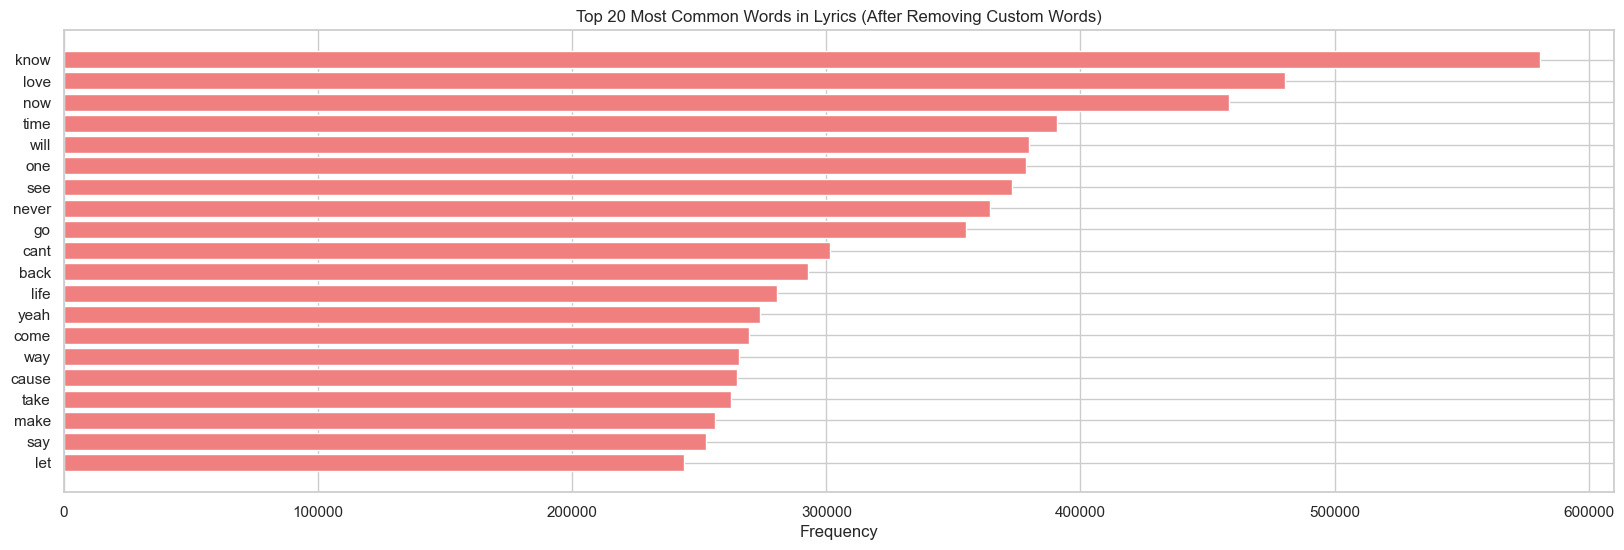

In [7]:
#init an empty list to store all words from cleaned lyrics 
cleaned_words = []
df['cleaned_lyrics'].apply(lambda x: cleaned_words.extend(x.split()))
# Count the frequency of each word in the cleaned_words list using Counter
cleaned_word_counts = Counter(cleaned_words)
cleaned_common_words = cleaned_word_counts.most_common(20)

words, counts = zip(*cleaned_common_words)
#set size of figure, create a horizontal bar chart, add a label for x axis and title for the chart and display the plot
plt.figure(figsize=(20, 6))
plt.barh(words, counts, color='lightcoral')
plt.xlabel('Frequency')
plt.title('Top 20 Most Common Words in Lyrics (After Removing Custom Words)')
plt.gca().invert_yaxis()
plt.show()


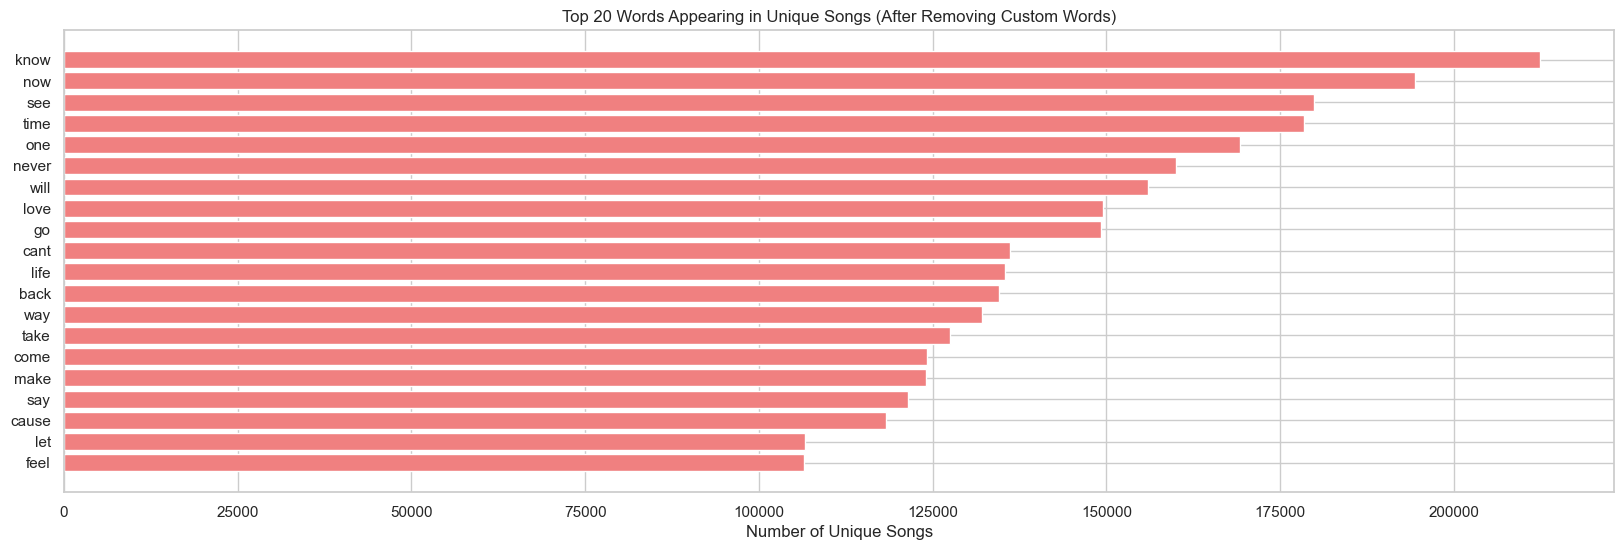

In [4]:
#init a Counter to store the number of songs each word appears in
word_in_songs = Counter()
#loop through each songs cleaned lyrics and convert the lyrics to a set of unique words 
for lyrics in df['cleaned_lyrics']:
    unique_words = set(lyrics.split())  
    word_in_songs.update(unique_words)  
#get the 20 most common words that appear in unique songs
common_words_in_songs = word_in_songs.most_common(20)

words, counts = zip(*common_words_in_songs)
#set size of figure, create a horizontal bar chart, add a label for x axis and title for the chart and display the plot
plt.figure(figsize=(20, 6))
plt.barh(words, counts, color='lightcoral')
plt.xlabel('Number of Unique Songs')
plt.title('Top 20 Words Appearing in Unique Songs (After Removing Custom Words)')
plt.gca().invert_yaxis()
plt.show()


C:\Users\zaidf\AppData\Local\Temp\ipykernel_42576\3944390439.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='genre', y='word_count', data=df, palette='coolwarm')


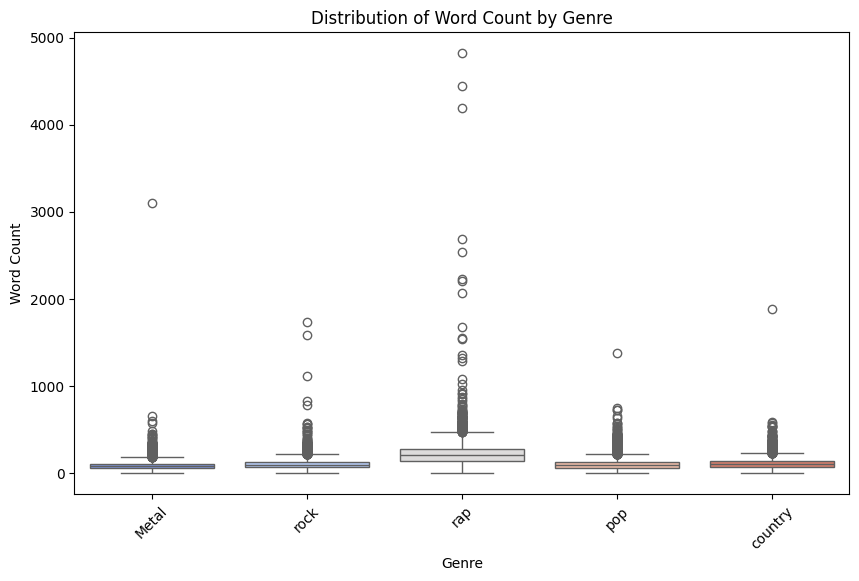

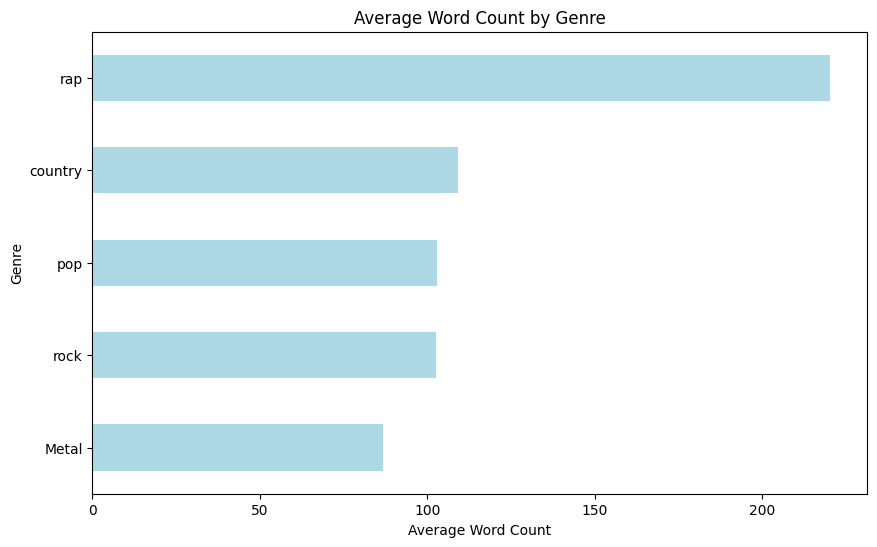

In [15]:
#add a new column 'word_count' that calculates the number of words in each song's cleaned lyrics
df['word_count'] = df['cleaned_lyrics'].apply(lambda x: len(x.split()))
# Set the figure size for the boxplot and create a boxplot showing the distribution of word counts by genre
plt.figure(figsize=(10, 6))

sns.boxplot(x='genre', y='word_count', data=df, palette='coolwarm')

plt.title('Distribution of Word Count by Genre')
plt.xlabel('Genre')
plt.ylabel('Word Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
#calculate the average word count per genre and sort the values and create a horizontal bar chart showing the average word count by genre
average_word_count_by_genre = df.groupby('genre')['word_count'].mean().sort_values()
average_word_count_by_genre.plot(kind='barh', color='lightblue')

plt.title('Average Word Count by Genre')
plt.xlabel('Average Word Count')
plt.ylabel('Genre')
plt.show()
